## Setup

In [1]:
from IPython.display import clear_output

!pip install wordcloud
!pip install transformers
!pip install torchmetrics
!pip install scikit-learn

clear_output()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/kaggle/input/teknofest-deneme/teknofest_train_final.csv", sep="|")

## EDA

In [4]:
df

,id,text,is_offensive,target
0,81c11060-a240-4d54-841b-9e2916039e85,çürük dişli,1,INSULT
1,be80ebbf-b322-4c3b-afa1-94932ea80731,Bu adamın islama ve müslümanlara verdiği zarar...,1,RACIST
2,f99e2513-83ed-4076-ac72-b9e2cff3f049,erkekler zora gelmez,1,SEXIST
3,83ed2b2e-b815-4f36-9fc4-80a9050cf2d0,Utanmazın götüne kazık sokmuşlar bu tıkırtı ne...,1,PROFANITY
4,d93e05f7-bfdd-4cdb-99d8-3048761b30ff,otomasyon< sistemlerine= doğrudan bağlanabilir,0,OTHER
...,...,...,...,...
12612,71eedfa1-8fa6-425c-b982-258c3b29c003,uyuma taklidi yapan tehlikeli bir hayvanın göz...,0,OTHER
12613,b38eed16-6501-4563-8b33-ff2e634bb8e5,yolda at kavga eden üç oğlan çocuğu görür,0,OTHER
12614,c8a051a8-94ef-4b64-a48e-54d0fa4f8323,sizin köpeklerinizin burnu bile daha iyi koku ...,0,OTHER
12615,513a7e6d-4207-4a16-9b47-972f26e23cfe,hayalleri gerçek etmek için birisinin delilik ...,0,OTHER


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12617 entries, 0 to 12616
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            12617 non-null  object
 1   text          12617 non-null  object
 2   is_offensive  12617 non-null  int64 
 3   target        12617 non-null  object
dtypes: int64(1), object(3)
memory usage: 394.4+ KB


In [6]:
len(df.id.unique())

12617

In [7]:
df.is_offensive.value_counts()

1    9018
0    3599
Name: is_offensive, dtype: int64

In [8]:
df.target.value_counts()

OTHER        3616
INSULT       2419
PROFANITY    2398
SEXIST       2112
RACIST       2072
Name: target, dtype: int64

In [9]:
df.loc[df.is_offensive == 0, "target"].value_counts()

OTHER        3544
RACIST         18
SEXIST         13
PROFANITY      12
INSULT         12
Name: target, dtype: int64

In [10]:
df.loc[df.is_offensive == 1, "target"].value_counts()

INSULT       2407
PROFANITY    2386
SEXIST       2099
RACIST       2054
OTHER          72
Name: target, dtype: int64

In [11]:
for is_offensive in [0,1]:

    avg_word_count = df.loc[df.is_offensive == is_offensive, "text"].apply(lambda x: len(x.split())).mean()
    print(is_offensive, "avg word count: ", avg_word_count)

0 avg word count:  8.257571547652125
1 avg word count:  5.276003548458638


In [12]:
for target in df.target.unique().tolist():

    avg_word_count = df.loc[df.target == target, "text"].apply(lambda x: len(x.split())).mean()
    print(target, "avg word count: ", avg_word_count)

INSULT avg word count:  4.75155022736668
RACIST avg word count:  5.840733590733591
SEXIST avg word count:  5.520833333333333
PROFANITY avg word count:  5.01417848206839
OTHER avg word count:  8.301438053097344


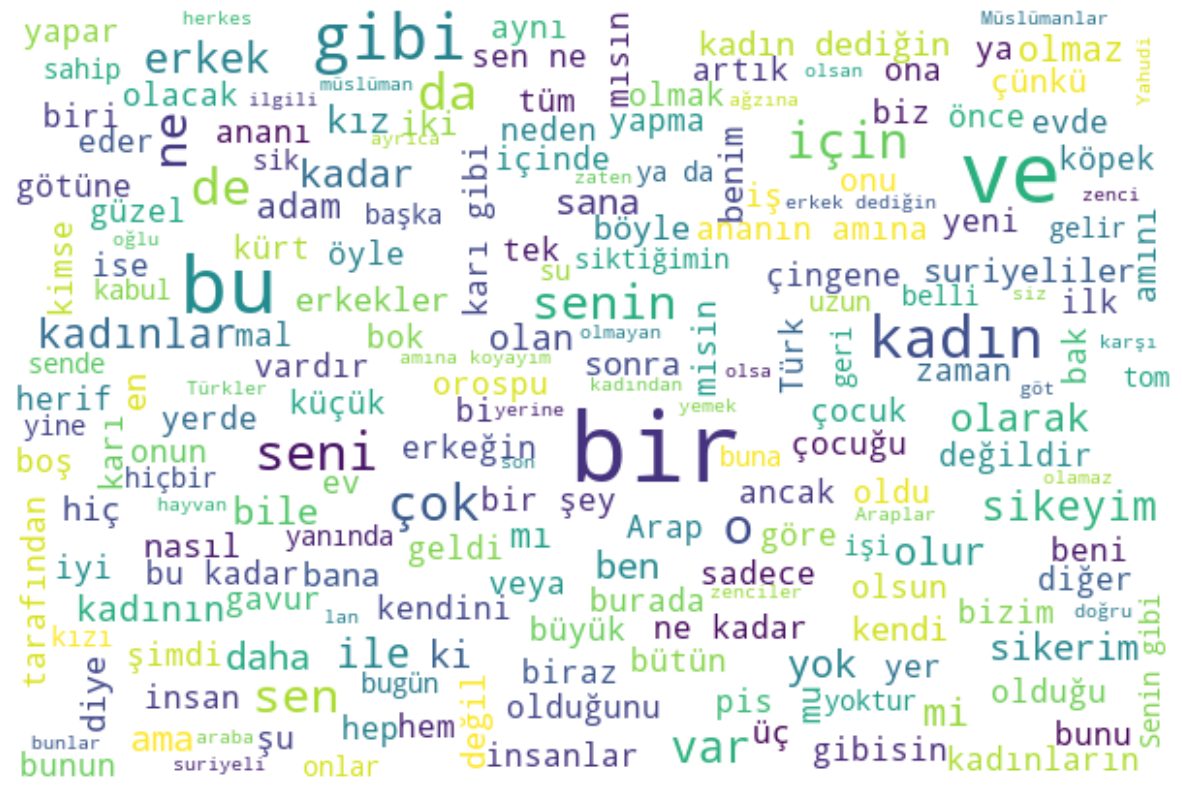

In [13]:
text = " ".join(txt for txt in df.text)

wordcloud = WordCloud(max_font_size=50, width=600, height=400, background_color="white").generate(text)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

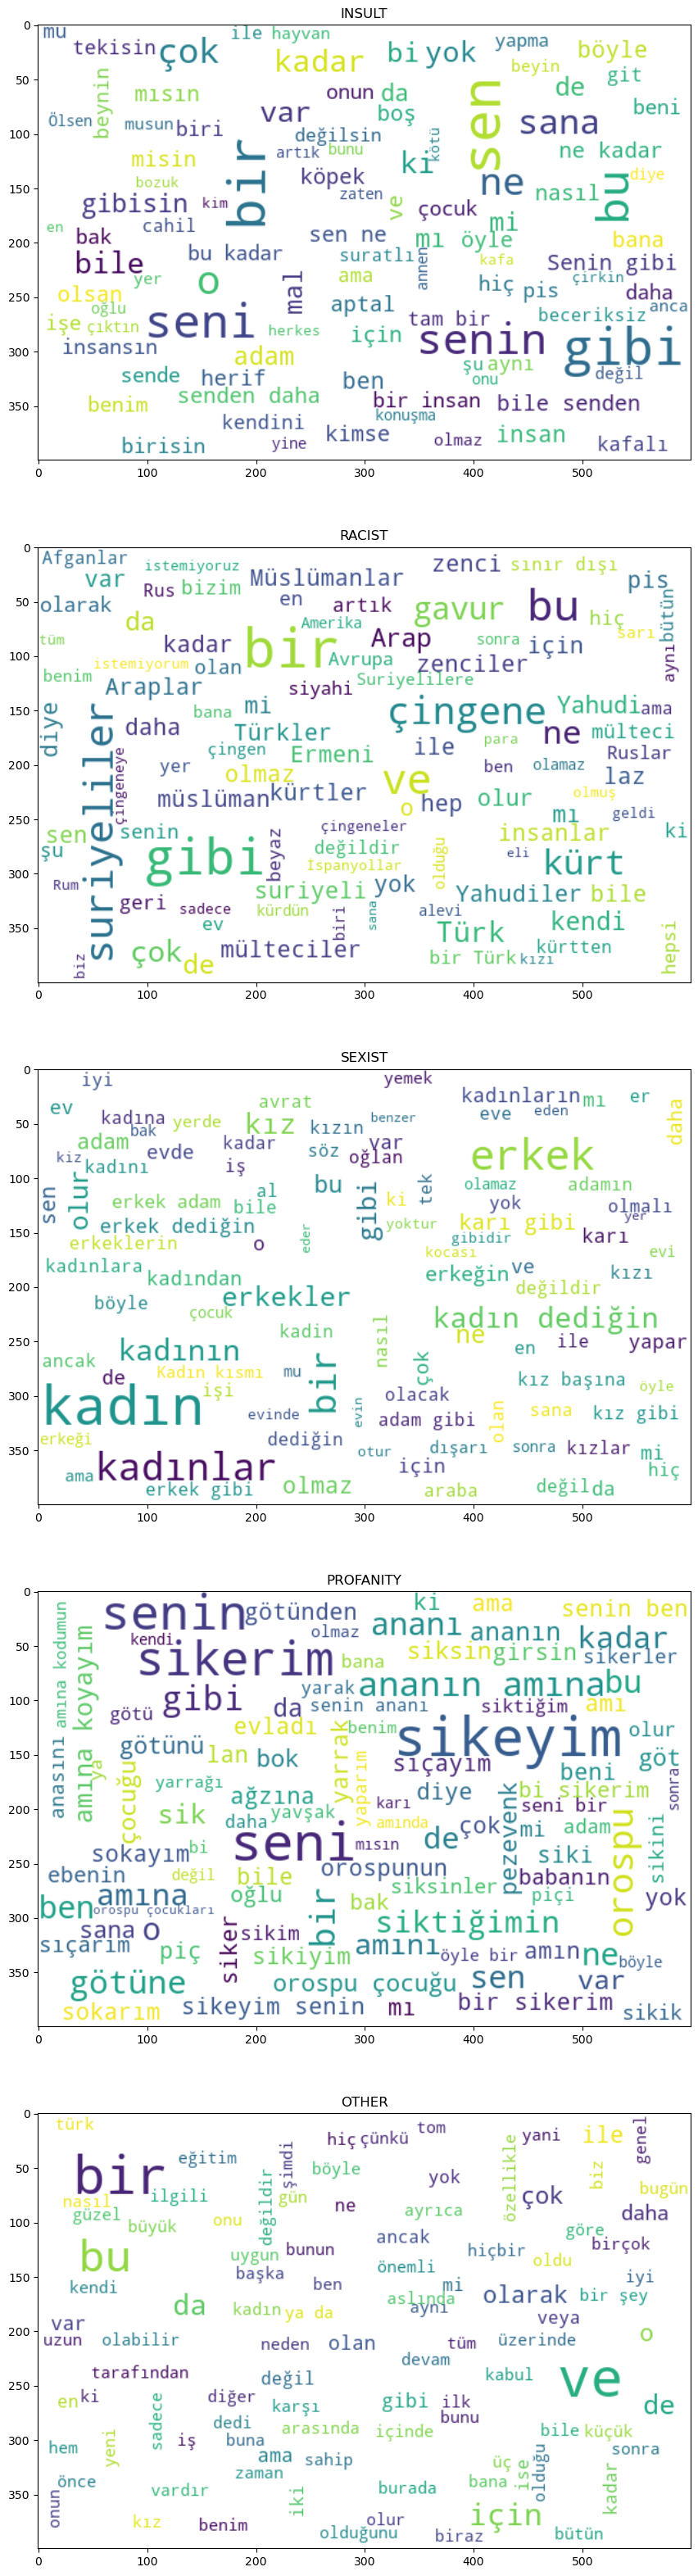

In [14]:
fig, axs = plt.subplots(5, 1, figsize=(20,40))

for idx, target in enumerate(df.target.unique().tolist()):

    text = " ".join(txt for txt in df.loc[df.target == target, "text"])
    wordcloud = WordCloud(max_font_size=50, max_words=100, width=600, height=400, background_color="white").generate(text)

    axs[idx].imshow(wordcloud, interpolation='bilinear')
    axs[idx].set_title(target)

In [15]:
df.loc[df.text.apply(lambda x: len(x) == 0)]

,id,text,is_offensive,target


In [16]:
df.loc[df.text.apply(lambda x: len(x) == 1)]

,id,text,is_offensive,target
12340,e2d954b7-266d-43be-845e-015a8ecf1241,j,0,RACIST
12341,697c1629-d4f6-4e85-87f6-3fa5510f55cf,k,1,RACIST
12342,f760cf45-ad05-46e7-9971-2b515decae97,e,1,RACIST
12343,03307826-defb-4e34-aa5a-b74ca74c84c2,e,0,RACIST
12344,42bf5d9d-48ab-489f-a673-d6d792f97eb9,b,0,SEXIST
...,...,...,...,...
12485,65ca945d-15af-4d59-8d7d-b731578e45d8,e,1,PROFANITY
12486,593b9691-8287-4400-bb22-ca2add665b9a,j,0,OTHER
12487,6d93aea2-8130-4168-81ea-bd8557ce3272,b,1,OTHER
12488,b89720e0-fdf3-44c8-ae20-14e8fe2d94af,h,0,OTHER


In [17]:
df.loc[df.text.apply(lambda x: len(x) == 2)]

,id,text,is_offensive,target


In [18]:
df.loc[df.text.apply(lambda x: len(x) == 3)]

,id,text,is_offensive,target


In [19]:
df.loc[df.text.apply(lambda x: len(x) == 4)]

,id,text,is_offensive,target


In [20]:
df.loc[df.text.apply(lambda x: len(x) == 5)]

,id,text,is_offensive,target
158,928b78c5-d30c-4abe-8670-f49cde0b8a8f,sokuk,1,PROFANITY


#### Drop rows that texts has 1 char

In [21]:
df = df.drop(df.loc[df.text.apply(lambda x: len(x) == 1)].index)

In [22]:
df.loc[df.is_offensive == 0, "target"].value_counts()

OTHER    3528
Name: target, dtype: int64

In [23]:
df.loc[df.is_offensive == 1, "target"].value_counts()

INSULT       2393
PROFANITY    2376
SEXIST       2081
RACIST       2033
OTHER          56
Name: target, dtype: int64

#### Fix 'is_offensive' value for mismatch rows

In [24]:
df.loc[(df.is_offensive == 1) & (df.target == "OTHER"), "is_offensive"] = 0

## Model

In [25]:
import os
import copy
import shutil
from tqdm import tqdm

import torch
from torch import nn
import torchmetrics
from torch.utils.data import Dataset, DataLoader
from torch.optim.swa_utils import AveragedModel, SWALR
from transformers import AutoConfig, AutoModelForSequenceClassification, AutoTokenizer, AdamW, get_linear_schedule_with_warmup, PreTrainedModel

In [26]:
class CFG:
    model_path = "dbmdz/bert-base-turkish-cased"
    max_length = 300
    batch_size = 8
    device = "cuda"
    num_labels = 5

In [27]:
data = df.copy()

In [28]:
data.loc[data.target == "OTHER", "target"] = 0
data.loc[data.target == "INSULT", "target"] = 1
data.loc[data.target == "PROFANITY", "target"] = 2
data.loc[data.target == "SEXIST", "target"] = 3
data.loc[data.target == "RACIST", "target"] = 4

data.target = data.target.astype(int)

In [29]:
data.drop(["id", "is_offensive"], axis=1, inplace=True)
data.rename(columns={"target": "labels"}, inplace=True)

In [30]:
tokenizer = AutoTokenizer.from_pretrained(CFG.model_path)

In [31]:
class AcikHackDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self,idx):
        item = {key: torch.tensor(value[idx]) for key, value in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

In [32]:
class CustomModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.model_path = CFG.model_path
        self.config = AutoConfig.from_pretrained(self.model_path, num_labels=CFG.num_labels)
        self.model = AutoModelForSequenceClassification.from_pretrained(
            pretrained_model_name_or_path=self.model_path,
            config=self.config,
        )     

    def forward(self, input_ids, attention_mask, labels):
        return self.model(
            input_ids=input_ids, attention_mask=attention_mask, labels=labels
        )

In [33]:
# model.config.save_pretrained("/content/drive/MyDrive/Colab Notebooks/Teknofest/NLP/")

In [34]:
# tokenizer.save_pretrained("/content/drive/MyDrive/Colab Notebooks/Teknofest/NLP/")

In [35]:
def val_fn(model, dataloader):
    model.eval()
    with torch.inference_mode():
        for batch in tqdm(dataloader):

            input_ids = batch['input_ids'].to(CFG.device)
            attention_mask = batch['attention_mask'].to(CFG.device)
            labels = batch['labels'].to(CFG.device)

            outputs = model(input_ids=input_ids, 
                            attention_mask=attention_mask,
                            labels=labels)

            logits = torch.argmax(outputs.logits, dim=1)
            f1_score = metric(logits, labels).item()

    return metric.compute().item()

In [36]:
def train_val_fn(model, train_dataloader, val_dataloader, EARLY_STOP_THRESHOLD, swa_model, swa_scheduler, scheduler, swa_step=False):
    model.train()

    best_score = 0
    for idx, batch in enumerate(train_dataloader):
        input_ids = batch['input_ids'].to(CFG.device)
        attention_mask = batch['attention_mask'].to(CFG.device)
        labels = batch['labels'].to(CFG.device)

        outputs = model(input_ids=input_ids, 
                        attention_mask=attention_mask,
                        labels=labels)

        optim.zero_grad()

        loss = outputs.loss
        loss.backward()

        optim.step()

        if swa_step:            
            swa_model.update_parameters(model)
            swa_scheduler.step()
        else:        
            scheduler.step()

        if (idx % 1000 == 0) or ((idx + 1) == len(train_dataloader)):

            score = val_fn(model, val_dataloader)
            print(score)
            print(best_score)

            if score > best_score:
                print(f"FOLD: {fold}, Epoch: {epoch}, Batch {idx}, F1 = {round(score,4)}, checkpoint saved.")
                best_score = score
                early_stopping_counter = 0

                with torch.inference_mode():
                    best_model = copy.deepcopy(model.state_dict())
                    best_swa_model = copy.deepcopy(swa_model.state_dict())

                checkpoint = {
                    'model' : model.state_dict(),
                    'best_model' : best_model,
                    'best_metric' : best_score,
                }
                torch.save(checkpoint,  f"/kaggle/working/model_{fold}/model.pt")

                if swa_step:
                    checkpoint = {
                        'model' : model.state_dict(),
                        'best_model' : best_swa_model,
                        'best_metric' : best_score,
                    }
                    torch.save(checkpoint,  f"/kaggle/working/model_swa_{fold}/model.pt")
            else:
                print(f"FOLD: {fold}, Epoch: {epoch}, Batch {idx}, F1 = {round(score,4)}")
                early_stopping_counter += 1
            if early_stopping_counter > EARLY_STOP_THRESHOLD:                
                print(f"Early stopping triggered!")                
                break

In [37]:
from sklearn.model_selection import StratifiedKFold

In [38]:
skf = StratifiedKFold(n_splits=5)

In [39]:
data = data.reset_index().drop("index", axis=1)

In [40]:
for fold, (train_index, test_index) in enumerate(skf.split(data["text"], data["labels"])):
    train = data.loc[train_index].reset_index().drop("index", axis=1)
    test = data.loc[test_index].reset_index().drop("index", axis=1)

    train_encodings = tokenizer(train["text"].values.tolist(), truncation=True, padding=True)
    test_encodings = tokenizer(test["text"].values.tolist(), truncation=True, padding=True)

    train_dataset = AcikHackDataset(train_encodings, train["labels"])
    test_dataset = AcikHackDataset(test_encodings, test["labels"])

    train_dataloader = DataLoader(train_dataset, batch_size=CFG.batch_size, shuffle=True)
    test_dataloader = DataLoader(test_dataset, batch_size=CFG.batch_size, shuffle=False)

    model = CustomModel().to(CFG.device)

    optim = AdamW(model.parameters(), lr=5e-5)
    metric = torchmetrics.classification.MulticlassF1Score(num_classes=CFG.num_labels, 
                                                       average="macro"
                                                       ).to(CFG.device)

    swa_model = AveragedModel(model).to(CFG.device)
    swa_scheduler = SWALR(optim, swa_lr=5e-5)

    train_steps = int(len(train) / 8 * 3)
    scheduler = get_linear_schedule_with_warmup(                
                    optimizer = optim,
                    num_warmup_steps = 50,
                    num_training_steps = train_steps
    )

    os.mkdir(f"/kaggle/working/model_{fold}/")
    os.mkdir(f"/kaggle/working/model_swa_{fold}/")

    for epoch in range(3):
        print("\n")
        print("Epoch", epoch)

        # print("Train step")
        # train_fn(model, train_dataloader)

        # print("Val step")
        # test_fn(model, test_dataloader)

        train_val_fn(model, train_dataloader, test_dataloader, 50, swa_model, swa_scheduler, scheduler, swa_step=True)

        print("\n")
        print("F1 Score:", metric.compute().item())

        metric.reset()

Some weights of the model checkpoint at dbmdz/bert-base-turkish-cased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were 



Epoch 0


100%|██████████| 312/312 [00:08<00:00, 38.25it/s]


0.08141099661588669
0
FOLD: 0, Epoch: 0, Batch 0, F1 = 0.0814, checkpoint saved.


100%|██████████| 312/312 [00:08<00:00, 35.09it/s]


0.5639543533325195
0.08141099661588669
FOLD: 0, Epoch: 0, Batch 1000, F1 = 0.564, checkpoint saved.


100%|██████████| 312/312 [00:08<00:00, 34.86it/s]


0.6877981424331665
0.5639543533325195
FOLD: 0, Epoch: 0, Batch 1246, F1 = 0.6878, checkpoint saved.


F1 Score: 0.6877981424331665


Epoch 1


100%|██████████| 312/312 [00:08<00:00, 34.85it/s]


0.9343711137771606
0
FOLD: 0, Epoch: 1, Batch 0, F1 = 0.9344, checkpoint saved.


100%|██████████| 312/312 [00:08<00:00, 34.99it/s]


0.9328670501708984
0.9343711137771606
FOLD: 0, Epoch: 1, Batch 1000, F1 = 0.9329


100%|██████████| 312/312 [00:08<00:00, 35.11it/s]


0.9348999261856079
0.9343711137771606
FOLD: 0, Epoch: 1, Batch 1246, F1 = 0.9349, checkpoint saved.


F1 Score: 0.9348999261856079


Epoch 2


100%|██████████| 312/312 [00:08<00:00, 35.19it/s]


0.9385188221931458
0
FOLD: 0, Epoch: 2, Batch 0, F1 = 0.9385, checkpoint saved.


100%|██████████| 312/312 [00:08<00:00, 35.06it/s]


0.9293842315673828
0.9385188221931458
FOLD: 0, Epoch: 2, Batch 1000, F1 = 0.9294


100%|██████████| 312/312 [00:08<00:00, 34.99it/s]


0.9307593107223511
0.9385188221931458
FOLD: 0, Epoch: 2, Batch 1246, F1 = 0.9308


F1 Score: 0.9307593107223511


Some weights of the model checkpoint at dbmdz/bert-base-turkish-cased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were 



Epoch 0


100%|██████████| 312/312 [00:07<00:00, 43.24it/s]


0.1449141800403595
0
FOLD: 1, Epoch: 0, Batch 0, F1 = 0.1449, checkpoint saved.


100%|██████████| 312/312 [00:07<00:00, 43.28it/s]


0.5639325976371765
0.1449141800403595
FOLD: 1, Epoch: 0, Batch 1000, F1 = 0.5639, checkpoint saved.


100%|██████████| 312/312 [00:07<00:00, 43.03it/s]


0.6824674606323242
0.5639325976371765
FOLD: 1, Epoch: 0, Batch 1246, F1 = 0.6825, checkpoint saved.


F1 Score: 0.6824674606323242


Epoch 1


100%|██████████| 312/312 [00:07<00:00, 42.87it/s]


0.9248473644256592
0
FOLD: 1, Epoch: 1, Batch 0, F1 = 0.9248, checkpoint saved.


100%|██████████| 312/312 [00:07<00:00, 43.08it/s]


0.9234670400619507
0.9248473644256592
FOLD: 1, Epoch: 1, Batch 1000, F1 = 0.9235


100%|██████████| 312/312 [00:07<00:00, 43.12it/s]


0.9277889728546143
0.9248473644256592
FOLD: 1, Epoch: 1, Batch 1246, F1 = 0.9278, checkpoint saved.


F1 Score: 0.9277889728546143


Epoch 2


100%|██████████| 312/312 [00:07<00:00, 43.25it/s]


0.9365496039390564
0
FOLD: 1, Epoch: 2, Batch 0, F1 = 0.9365, checkpoint saved.


100%|██████████| 312/312 [00:07<00:00, 43.14it/s]


0.9386675953865051
0.9365496039390564
FOLD: 1, Epoch: 2, Batch 1000, F1 = 0.9387, checkpoint saved.


100%|██████████| 312/312 [00:07<00:00, 42.89it/s]


0.9390711784362793
0.9386675953865051
FOLD: 1, Epoch: 2, Batch 1246, F1 = 0.9391, checkpoint saved.


F1 Score: 0.9390711784362793


Some weights of the model checkpoint at dbmdz/bert-base-turkish-cased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were 



Epoch 0


100%|██████████| 312/312 [00:08<00:00, 35.37it/s]


0.15870757400989532
0
FOLD: 2, Epoch: 0, Batch 0, F1 = 0.1587, checkpoint saved.


100%|██████████| 312/312 [00:08<00:00, 35.27it/s]


0.588196337223053
0.15870757400989532
FOLD: 2, Epoch: 0, Batch 1000, F1 = 0.5882, checkpoint saved.


100%|██████████| 312/312 [00:08<00:00, 34.94it/s]


0.7030935287475586
0.588196337223053
FOLD: 2, Epoch: 0, Batch 1246, F1 = 0.7031, checkpoint saved.


F1 Score: 0.7030935287475586


Epoch 1


100%|██████████| 312/312 [00:08<00:00, 35.32it/s]


0.9337260723114014
0
FOLD: 2, Epoch: 1, Batch 0, F1 = 0.9337, checkpoint saved.


100%|██████████| 312/312 [00:08<00:00, 35.25it/s]


0.937886655330658
0.9337260723114014
FOLD: 2, Epoch: 1, Batch 1000, F1 = 0.9379, checkpoint saved.


100%|██████████| 312/312 [00:08<00:00, 35.11it/s]


0.9370556473731995
0.937886655330658
FOLD: 2, Epoch: 1, Batch 1246, F1 = 0.9371


F1 Score: 0.9370556473731995


Epoch 2


100%|██████████| 312/312 [00:08<00:00, 35.06it/s]


0.9340283870697021
0
FOLD: 2, Epoch: 2, Batch 0, F1 = 0.934, checkpoint saved.


100%|██████████| 312/312 [00:09<00:00, 34.55it/s]


0.9418696761131287
0.9340283870697021
FOLD: 2, Epoch: 2, Batch 1000, F1 = 0.9419, checkpoint saved.


100%|██████████| 312/312 [00:08<00:00, 35.20it/s]


0.9390073418617249
0.9418696761131287
FOLD: 2, Epoch: 2, Batch 1246, F1 = 0.939


F1 Score: 0.9390073418617249


Some weights of the model checkpoint at dbmdz/bert-base-turkish-cased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were 



Epoch 0


100%|██████████| 312/312 [00:06<00:00, 48.95it/s]


0.19431090354919434
0
FOLD: 3, Epoch: 0, Batch 0, F1 = 0.1943, checkpoint saved.


100%|██████████| 312/312 [00:06<00:00, 49.54it/s]


0.5826151371002197
0.19431090354919434
FOLD: 3, Epoch: 0, Batch 1000, F1 = 0.5826, checkpoint saved.


100%|██████████| 312/312 [00:06<00:00, 49.59it/s]


0.7004795670509338
0.5826151371002197
FOLD: 3, Epoch: 0, Batch 1246, F1 = 0.7005, checkpoint saved.


F1 Score: 0.7004795670509338


Epoch 1


100%|██████████| 312/312 [00:06<00:00, 49.48it/s]


0.9401924014091492
0
FOLD: 3, Epoch: 1, Batch 0, F1 = 0.9402, checkpoint saved.


100%|██████████| 312/312 [00:06<00:00, 49.54it/s]


0.9347454905509949
0.9401924014091492
FOLD: 3, Epoch: 1, Batch 1000, F1 = 0.9347


100%|██████████| 312/312 [00:06<00:00, 49.60it/s]


0.9374843835830688
0.9401924014091492
FOLD: 3, Epoch: 1, Batch 1246, F1 = 0.9375


F1 Score: 0.9374843835830688


Epoch 2


100%|██████████| 312/312 [00:06<00:00, 48.42it/s]


0.9431934952735901
0
FOLD: 3, Epoch: 2, Batch 0, F1 = 0.9432, checkpoint saved.


100%|██████████| 312/312 [00:06<00:00, 49.03it/s]


0.9388260841369629
0.9431934952735901
FOLD: 3, Epoch: 2, Batch 1000, F1 = 0.9388


100%|██████████| 312/312 [00:06<00:00, 49.29it/s]


0.9338425397872925
0.9431934952735901
FOLD: 3, Epoch: 2, Batch 1246, F1 = 0.9338


F1 Score: 0.9338425397872925


Some weights of the model checkpoint at dbmdz/bert-base-turkish-cased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were 



Epoch 0


100%|██████████| 312/312 [00:09<00:00, 32.76it/s]


0.1729995459318161
0
FOLD: 4, Epoch: 0, Batch 0, F1 = 0.173, checkpoint saved.


100%|██████████| 312/312 [00:09<00:00, 32.45it/s]


0.6003868579864502
0.1729995459318161
FOLD: 4, Epoch: 0, Batch 1000, F1 = 0.6004, checkpoint saved.


100%|██████████| 312/312 [00:09<00:00, 32.38it/s]


0.7101576924324036
0.6003868579864502
FOLD: 4, Epoch: 0, Batch 1246, F1 = 0.7102, checkpoint saved.


F1 Score: 0.7101576924324036


Epoch 1


100%|██████████| 312/312 [00:09<00:00, 32.62it/s]


0.9174486994743347
0
FOLD: 4, Epoch: 1, Batch 0, F1 = 0.9174, checkpoint saved.


100%|██████████| 312/312 [00:09<00:00, 32.52it/s]


0.923974871635437
0.9174486994743347
FOLD: 4, Epoch: 1, Batch 1000, F1 = 0.924, checkpoint saved.


100%|██████████| 312/312 [00:09<00:00, 32.36it/s]


0.9246621131896973
0.923974871635437
FOLD: 4, Epoch: 1, Batch 1246, F1 = 0.9247, checkpoint saved.


F1 Score: 0.9246621131896973


Epoch 2


100%|██████████| 312/312 [00:09<00:00, 32.64it/s]


0.9268974661827087
0
FOLD: 4, Epoch: 2, Batch 0, F1 = 0.9269, checkpoint saved.


100%|██████████| 312/312 [00:09<00:00, 32.56it/s]


0.9235341548919678
0.9268974661827087
FOLD: 4, Epoch: 2, Batch 1000, F1 = 0.9235


100%|██████████| 312/312 [00:09<00:00, 32.57it/s]

0.9191732406616211
0.9268974661827087
FOLD: 4, Epoch: 2, Batch 1246, F1 = 0.9192


F1 Score: 0.9191732406616211
